# BLENDHUNTER RESULTS
---

<br>
Comparison of BlendHunter's results with respect to the variation of noise standard deviation on simulated images.
The results were retrieved after a single run of the Top Model for each value of $\sigma_{noise}$.
<br>

## Contents
---

1. [DATA PREPARATION](#1-DATA-PREPARATION)
1. [SATISTICS OF THE MODEL](#2-STATISTICS-OF-THE-MODEL)
    1. [Total Errors](#NUMBER-OF-ERRORS-ACCORDING-TO-$\sigma_{noise}$-VALUE)
    1. [Missed Blends](#NUMBER-OF-FALSE-NEGATIVES-(MISSED-BLENDS))
    1. [Mistaken for Blends](#NUMBER-OF-FALSE-POSITIVES-(MISTAKEN-FOR-BLENDS))
    1. [Overlapping Objects](#NUMBER-OF-OVERLAPPING-OBJECTS)
    1. [Separated Objects](#NUMBER-OF-SEPARATED-OBJECTS)
1. [RESULTS AND PLOTS](#3-RESULTS-AND-PLOTS)
    1. [Errors and Distance between Objects](#ERRORS-AND-DISTANCE-BETWEEN-OBJECTS)
    1. [Errors and PSF (fwhm)](#ERRORS-AND-PSF-(fwhm))
    1. [Errors and SNR of the Central Object](#ERRORS-AND-SNR-OF-THE-CENTRAL-OBJECT-(-$\alpha$-))
    1. [Errors and SNR of the Second Object](#ERRORS-AND-SNR-OF-SECOND-OBJECT-(-$\beta$-))
    1. [Errors and PSI ratio(SNR_ALPHA / SNR_BETA)](#ERRORS-AND-PSI-RATIO-(SNR_$\alpha$/SNR_$\beta$))

# 1 DATA PREPARATION
---

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import galsim

#### PATHS

In [5]:
ipath = '/Users/alacan/Documents/Cosmostat/Codes/BlendHunter'
input_path0 = ipath+'/bh/BlendHunterData/test/test'
input_path5 = ipath+'/bh_5/BlendHunterData/test/test'
input_path14 = ipath+'/bh_14/BlendHunterData/test/test'
input_path18 = ipath+'/bh_18/BlendHunterData/test/test'
input_path22 = ipath+'/bh_22/BlendHunterData/test/test'
input_path26 = ipath+'/bh_26/BlendHunterData/test/test'
input_path35 = ipath+'/bh_35/BlendHunterData/test/test'
input_path40 = ipath+'/bh_40/BlendHunterData/test/test'

#### TRUE LABELS

In [6]:
#True labels
labels = np.load(input_path0+'/labels.npy', allow_pickle=True)

#### PREDICTED LABELS

In [38]:
#Predicted labels
pred_top0 = np.load(input_path0+'/pred_top_tune.npy', allow_pickle=True)
pred_top5 = np.load(input_path5+'/pred_top_tune.npy', allow_pickle=True)
pred_top14 = np.load(input_path14+'/pred_top_tune.npy', allow_pickle=True)
pred_top18 = np.load(input_path18+'/pred_top_tune.npy', allow_pickle=True)
#pred_top22 = np.load(input_path22+'/pred_top.npy', allow_pickle=True)
pred_top26 = np.load(input_path26+'/pred_top_tune.npy', allow_pickle=True)
pred_top35 = np.load(input_path35+'/pred_top_tune.npy', allow_pickle=True)
pred_top40 = np.load(input_path40+'/pred_top_tune.npy', allow_pickle=True)

In [39]:
#Reshape predicted labels array
preds0 = np.array([pred_top0])
preds5 = np.array([pred_top5])
preds14 = np.array([pred_top14])
preds18 = np.array([pred_top18])
#preds22 = np.array([pred_top22])
preds26 = np.array([pred_top26])
preds35 = np.array([pred_top35])
preds40 = np.array([pred_top40])

#### DATAFRAME

In [40]:
#Concatenate arrays
results_array =np.concatenate((labels.transpose(), preds0.transpose(), preds5.transpose(), preds14.transpose(), preds18.transpose()
                              , preds26.transpose(), preds35.transpose(), preds40.transpose()),axis=1)

# Create a DataFrame object
Results_top = pd.DataFrame(results_array, columns=['Labels', 'Preds0', 'Preds5', 'Preds14', 'Preds18', 'Preds26', 'Preds35', 'Preds40'])
print('The shape of our dataframe is '+str(Results_top.shape))

The shape of our dataframe is (8000, 8)


### PSF (`fwhm`)

In [41]:
#FWHM extracted from test images
fwhm = np.reshape(np.load(ipath+"/bh_5/test_psf.npy", allow_pickle=True), (8000, 1))

# Adding the fwhm columns
Results_top['fwhm'] = pd.DataFrame(fwhm)

### SHIFT PARAMETERS (`x`and `y`)

In [42]:
#X parameter extracted from test images
param_x = np.load(ipath+"/bh_5/test_param_x.npy", allow_pickle=True)

#Y parameter extracted from test images
param_y = np.load(ipath+"/bh_5/test_param_y.npy", allow_pickle=True)

# Add 2 columns to the dataframe 
Results_top['param_x']=pd.DataFrame(param_x)
Results_top['param_y']=pd.DataFrame(param_y)

### CALCULATION OF DISTANCES BETWEEN OBJECTS

In [43]:
#Adding a new column 'Distance' which corresponds to the sqrt of (x² + y²)
Results_top['Distance']= pd.DataFrame(np.sqrt(Results_top['param_x']**2 + Results_top['param_y']**2))

### SEGMENTATION MAP AND IMAGES

In [44]:
#Importing segmentation maps (blended and not blended)
sm = np.load(ipath+"/bh_5/test_seg_map.npy", allow_pickle=True)
#sm_nb = np.load(input_path+"/test_seg_map_nb.npy", allow_pickle=True)

#sm_test = np.vstack((sm, sm_nb))
#len(sm_test)

#Importing pxels values
img5 = np.load(ipath+"/bh_5/gal_im_blended.npy", allow_pickle=True)
img14 = np.load(ipath+"/bh_14/gal_im_blended.npy", allow_pickle=True)
img18 = np.load(ipath+"/bh_18/gal_im_blended.npy", allow_pickle=True)
img26 = np.load(ipath+"/bh_26/gal_im_blended.npy", allow_pickle=True)
img35 = np.load(ipath+"/bh_35/gal_im_blended.npy", allow_pickle=True)
img40 = np.load(ipath+"/bh_40/gal_im_blended.npy", allow_pickle=True)

### SEPARATION OF OVERLAPPING AND SEPARATED OBJECTS

In [45]:
#Create masks of separated objects or overlapping objects
def overlap_objects(arr):
    if np.sum(arr==3)>=1:
        return arr
    else:
        return np.zeros((51,51))
def separated_objects(arr):
     if np.sum(arr==3)==0:
        return arr
     else:
        return np.zeros((51,51))
def remove_none_elements(list):
     return [e for e in list if(pd.notnull(np.all(e)))]
    
#Mask for overlaps    
overlaps_mask = np.array([overlap_objects(sm[i]) for i in range(len(sm))])
#Mask for separated objects
separated_mask = np.array([separated_objects(sm[i]) for i in range(len(sm))])

print('VERIFICATION ~ There are {} blended objects in total.'.format((len(overlaps_mask)+len(separated_mask))/2))

VERIFICATION ~ There are 4000.0 blended objects in total.


### $\alpha$ and $\beta$ objects for blended images

#### TOTAL BLENDED OBJECTS

In [46]:
# Calculate the sum of squares of the masked elements
# ALPHA for blended elements
alpha_b5 = np.array([np.sum(img5[i][sm[i] == 1] ** 2) for i in range(len(img5))])
alpha_b5 = alpha_b5.reshape(4000,1)
"""#################"""
alpha_b14 = np.array([np.sum(img14[i][sm[i] == 1] ** 2) for i in range(len(img14))])
alpha_b14 = alpha_b14.reshape(4000,1)
"""#################"""
alpha_b18 = np.array([np.sum(img18[i][sm[i] == 1] ** 2) for i in range(len(img18))])
alpha_b18 = alpha_b18.reshape(4000,1)
"""#################"""
alpha_b26 = np.array([np.sum(img26[i][sm[i] == 1] ** 2) for i in range(len(img26))])
alpha_b26 = alpha_b26.reshape(4000,1)
"""#################"""
alpha_b35 = np.array([np.sum(img35[i][sm[i] == 1] ** 2) for i in range(len(img35))])
alpha_b35 = alpha_b35.reshape(4000,1)
"""#################"""
alpha_b40 = np.array([np.sum(img40[i][sm[i] == 1] ** 2) for i in range(len(img40))])
alpha_b40 = alpha_b40.reshape(4000,1)

# BETA
beta5 = [np.sum(img5[i][sm[i] == 2] ** 2) for i in range(len(img5))]
beta14 = [np.sum(img14[i][sm[i] == 2] ** 2) for i in range(len(img14))]
beta18 = [np.sum(img18[i][sm[i] == 2] ** 2) for i in range(len(img18))]
beta26 = [np.sum(img26[i][sm[i] == 2] ** 2) for i in range(len(img26))]
beta35 = [np.sum(img35[i][sm[i] == 2] ** 2) for i in range(len(img35))]
beta40 = [np.sum(img40[i][sm[i] == 2] ** 2) for i in range(len(img40))]

#### TOTAL SEPARATED OBJECTS

In [47]:
# Calculate the sum of squares of the masked elements
#ALPHA
alpha_S5 = [np.sum(img5[i][separated_mask[i] == 1] ** 2) for i in range(len(separated_mask))]
alpha_S14 = [np.sum(img14[i][separated_mask[i] == 1] ** 2) for i in range(len(separated_mask))]
alpha_S18 = [np.sum(img18[i][separated_mask[i] == 1] ** 2) for i in range(len(separated_mask))]
alpha_S26 = [np.sum(img26[i][separated_mask[i] == 1] ** 2) for i in range(len(separated_mask))]
alpha_S35 = [np.sum(img35[i][separated_mask[i] == 1] ** 2) for i in range(len(separated_mask))]
alpha_S40 = [np.sum(img40[i][separated_mask[i] == 1] ** 2) for i in range(len(separated_mask))]

# BETA
beta_S5 = [np.sum(img5[i][separated_mask[i] == 2] ** 2) for i in range(len(separated_mask))]
beta_S14 = [np.sum(img14[i][separated_mask[i] == 2] ** 2) for i in range(len(separated_mask))]
beta_S18 = [np.sum(img18[i][separated_mask[i] == 2] ** 2) for i in range(len(separated_mask))]
beta_S26 = [np.sum(img26[i][separated_mask[i] == 2] ** 2) for i in range(len(separated_mask))]
beta_S35 = [np.sum(img35[i][separated_mask[i] == 2] ** 2) for i in range(len(separated_mask))]
beta_S40 = [np.sum(img40[i][separated_mask[i] == 2] ** 2) for i in range(len(separated_mask))]

#### TOTAL OVERLAPPING OBJECTS

In [48]:
#ALPHA
alpha_O5 = [np.sum(img5[i][overlaps_mask[i] == 1] ** 2) for i in range(len(overlaps_mask))]
alpha_O14 = [np.sum(img14[i][overlaps_mask[i] == 1] ** 2) for i in range(len(overlaps_mask))]
alpha_O18 = [np.sum(img18[i][overlaps_mask[i] == 1] ** 2) for i in range(len(overlaps_mask))]
alpha_O26 = [np.sum(img26[i][overlaps_mask[i] == 1] ** 2) for i in range(len(overlaps_mask))]
alpha_O35 = [np.sum(img35[i][overlaps_mask[i] == 1] ** 2) for i in range(len(overlaps_mask))]
alpha_O40 = [np.sum(img40[i][overlaps_mask[i] == 1] ** 2) for i in range(len(overlaps_mask))]

# BETA
beta_O5 = [np.sum(img5[i][overlaps_mask[i] == 2] ** 2) for i in range(len(overlaps_mask))]
beta_O14 = [np.sum(img14[i][overlaps_mask[i] == 2] ** 2) for i in range(len(overlaps_mask))]
beta_O18 = [np.sum(img18[i][overlaps_mask[i] == 2] ** 2) for i in range(len(overlaps_mask))]
beta_O26 = [np.sum(img26[i][overlaps_mask[i] == 2] ** 2) for i in range(len(overlaps_mask))]
beta_O35 = [np.sum(img35[i][overlaps_mask[i] == 2] ** 2) for i in range(len(overlaps_mask))]
beta_O40 = [np.sum(img40[i][overlaps_mask[i] == 2] ** 2) for i in range(len(overlaps_mask))]

### CALCULATION OF THE SNR

#### NOISE STD DEVIATIONS ($\sigma$)
We tested the model with the following values for $\sigma_{noise}$ : `5.0`, `14.0`, `18.0`, `22.0`, `26.0`, `35.0`, `40.0`.

In [49]:
# Calculate the SNR for a given sigma
sigma0 = 0.0
sigma5 = 5.0
sigma14 = 14.0
sigma18 = 18.0
sigma22 = 22.0
sigma26 = 26.0
sigma35 = 35.0
sigma40 = 40.0

#### TOTAL BLENDED OBJECTS

In [50]:
# SNR for total blended objects
snr_a5 = [np.sqrt(alpha_b5[i] / sigma5**2) for i in range(len(alpha_b5))]
snr_b5 = [np.sqrt(beta5[i] / sigma5**2) for i in range(len(beta5))]

snr_a14 = [np.sqrt(alpha_b14[i] / sigma14**2) for i in range(len(alpha_b14))]
snr_b14 = [np.sqrt(beta14[i] / sigma14**2) for i in range(len(beta14))]

snr_a18 = [np.sqrt(alpha_b18[i] / sigma18**2) for i in range(len(alpha_b18))]
snr_b18 = [np.sqrt(beta18[i] / sigma18**2) for i in range(len(beta18))]

snr_a26 = [np.sqrt(alpha_b26[i] / sigma26**2) for i in range(len(alpha_b26))]
snr_b26 = [np.sqrt(beta26[i] / sigma26**2) for i in range(len(beta26))]

snr_a35 = [np.sqrt(alpha_b35[i] / sigma35**2) for i in range(len(alpha_b35))]
snr_b35 = [np.sqrt(beta35[i] / sigma35**2) for i in range(len(beta35))]

snr_a40 = [np.sqrt(alpha_b40[i] / sigma40**2) for i in range(len(alpha_b40))]
snr_b40 = [np.sqrt(beta40[i] / sigma40**2) for i in range(len(beta40))]


#Adding columns to dataframe
Results_top['snr_a5'] = pd.DataFrame(snr_a5)
Results_top['snr_b5'] = pd.DataFrame(snr_b5)
Results_top['snr_a14'] = pd.DataFrame(snr_a14)
Results_top['snr_b14'] = pd.DataFrame(snr_b14)
Results_top['snr_a18'] = pd.DataFrame(snr_a18)
Results_top['snr_b18'] = pd.DataFrame(snr_b18)
Results_top['snr_a26'] = pd.DataFrame(snr_a26)
Results_top['snr_b26'] = pd.DataFrame(snr_b26)
Results_top['snr_a35'] = pd.DataFrame(snr_a35)
Results_top['snr_b35'] = pd.DataFrame(snr_b35)
Results_top['snr_a40'] = pd.DataFrame(snr_a40)
Results_top['snr_b40'] = pd.DataFrame(snr_b40)

#### TOTAL SEPARATED OBJECTS

In [51]:
snr_a_S5 = [np.sqrt(alpha_S5[i] / sigma5**2) for i in range(len(alpha_S5))]
snr_b_S5 = [np.sqrt(beta_S5[i] / sigma5**2) for i in range(len(beta_S5))]

snr_a_S14 = [np.sqrt(alpha_S14[i] / sigma14**2) for i in range(len(alpha_S14))]
snr_b_S14 = [np.sqrt(beta_S14[i] / sigma14**2) for i in range(len(beta_S14))]

snr_a_S18 = [np.sqrt(alpha_S18[i] / sigma18**2) for i in range(len(alpha_S18))]
snr_b_S18 = [np.sqrt(beta_S18[i] / sigma18**2) for i in range(len(beta_S18))]

snr_a_S26 = [np.sqrt(alpha_S26[i] / sigma26**2) for i in range(len(alpha_S26))]
snr_b_S26 = [np.sqrt(beta_S26[i] / sigma26**2) for i in range(len(beta_S26))]

snr_a_S35 = [np.sqrt(alpha_S35[i] / sigma35**2) for i in range(len(alpha_S35))]
snr_b_S35 = [np.sqrt(beta_S35[i] / sigma35**2) for i in range(len(beta_S35))]

snr_a_S40 = [np.sqrt(alpha_S40[i] / sigma40**2) for i in range(len(alpha_S40))]
snr_b_S40 = [np.sqrt(beta_S40[i] / sigma40**2) for i in range(len(beta_S40))]



#Adding columns to dataframe
Results_top['snr_a_S5'] = pd.DataFrame(snr_a_S5)
Results_top['snr_b_S5'] = pd.DataFrame(snr_b_S5)
Results_top['snr_a_S14'] = pd.DataFrame(snr_a_S14)
Results_top['snr_b_S14'] = pd.DataFrame(snr_b_S14)
Results_top['snr_a_S18'] = pd.DataFrame(snr_a_S18)
Results_top['snr_b_S18'] = pd.DataFrame(snr_b_S18)
Results_top['snr_a_S26'] = pd.DataFrame(snr_a_S26)
Results_top['snr_b_S26'] = pd.DataFrame(snr_b_S26)
Results_top['snr_a_S35'] = pd.DataFrame(snr_a_S35)
Results_top['snr_b_S35'] = pd.DataFrame(snr_b_S35)
Results_top['snr_a_S40'] = pd.DataFrame(snr_a_S40)
Results_top['snr_b_S40'] = pd.DataFrame(snr_b_S40)

#### TOTAL OVERLAPPING OBJECTS

In [52]:
snr_a_O5 = [np.sqrt(alpha_O5[i] / sigma5**2) for i in range(len(alpha_O5))]
snr_b_O5 = [np.sqrt(beta_O5[i] / sigma5**2) for i in range(len(beta_O5))]

snr_a_O14 = [np.sqrt(alpha_O14[i] / sigma14**2) for i in range(len(alpha_O14))]
snr_b_O14 = [np.sqrt(beta_O14[i] / sigma14**2) for i in range(len(beta_O14))]

snr_a_O18 = [np.sqrt(alpha_O18[i] / sigma18**2) for i in range(len(alpha_O18))]
snr_b_O18 = [np.sqrt(beta_O18[i] / sigma18**2) for i in range(len(beta_O18))]

snr_a_O26 = [np.sqrt(alpha_O26[i] / sigma26**2) for i in range(len(alpha_O26))]
snr_b_O26 = [np.sqrt(beta_O26[i] / sigma26**2) for i in range(len(beta_O26))]

snr_a_O35 = [np.sqrt(alpha_O35[i] / sigma35**2) for i in range(len(alpha_O35))]
snr_b_O35 = [np.sqrt(beta_O35[i] / sigma35**2) for i in range(len(beta_O35))]

snr_a_O40 = [np.sqrt(alpha_O40[i] / sigma40**2) for i in range(len(alpha_O40))]
snr_b_O40 = [np.sqrt(beta_O40[i] / sigma40**2) for i in range(len(beta_O40))]

#Adding columns to dataframe
Results_top['snr_a_O5'] = pd.DataFrame(snr_a_O5)
Results_top['snr_b_O5'] = pd.DataFrame(snr_b_O5)
Results_top['snr_a_O14'] = pd.DataFrame(snr_a_O14)
Results_top['snr_b_O14'] = pd.DataFrame(snr_b_O14)
Results_top['snr_a_O18'] = pd.DataFrame(snr_a_O18)
Results_top['snr_b_O18'] = pd.DataFrame(snr_b_O18)
Results_top['snr_a_O26'] = pd.DataFrame(snr_a_O26)
Results_top['snr_b_O26'] = pd.DataFrame(snr_b_O26)
Results_top['snr_a_O35'] = pd.DataFrame(snr_a_O35)
Results_top['snr_b_O35'] = pd.DataFrame(snr_b_O35)
Results_top['snr_a_O40'] = pd.DataFrame(snr_a_O40)
Results_top['snr_b_O40'] = pd.DataFrame(snr_b_O40)

### CALCULATION OF SNR RATIO ($\psi$)

In [53]:
#Calculate ratio 
psi5 = [snr_a5[i]/snr_b5[i] for i in range(len(beta5))]
psi14 = [snr_a14[i]/snr_b14[i] for i in range(len(beta14))]
psi18 = [snr_a18[i]/snr_b18[i] for i in range(len(beta18))]
psi26 = [snr_a26[i]/snr_b26[i] for i in range(len(beta26))]
psi35 = [snr_a35[i]/snr_b35[i] for i in range(len(beta35))]
psi40 = [snr_a40[i]/snr_b40[i] for i in range(len(beta40))]


#Add psi columns
Results_top['psi5'] = pd.DataFrame(psi5)
Results_top['psi14'] = pd.DataFrame(psi14)
Results_top['psi18'] = pd.DataFrame(psi18)
Results_top['psi26'] = pd.DataFrame(psi26)
Results_top['psi35'] = pd.DataFrame(psi35)
Results_top['psi40'] = pd.DataFrame(psi40)

#Drop NaN because issue when plotting otherwise

Results_na = Results_top.dropna(axis=0, how='any')

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarni

In [69]:
Results_na['psi5']

0        0.578311
1        0.243933
2        0.149004
3        2.170717
4        5.147774
          ...    
3995    10.353377
3996     0.529335
3997     0.000000
3998     0.768452
3999     0.802946
Name: psi5, Length: 4000, dtype: float64

# 2 STATISTICS OF THE MODEL
---

## NUMBER OF `ERRORS` ACCORDING TO $\sigma_{noise}$ VALUE

In [55]:
# Apply function (true different from predicted)
ER0 = Results_top.apply(lambda x: True if x['Labels'] != x['Preds0'] else False , axis=1)
ER5 = Results_top.apply(lambda x: True if x['Labels'] != x['Preds5'] else False , axis=1)
ER14 = Results_top.apply(lambda x: True if x['Labels'] != x['Preds14'] else False , axis=1)
ER18 = Results_top.apply(lambda x: True if x['Labels'] != x['Preds18'] else False , axis=1)
ER26 = Results_top.apply(lambda x: True if x['Labels'] != x['Preds26'] else False , axis=1)
ER35 = Results_top.apply(lambda x: True if x['Labels'] != x['Preds35'] else False , axis=1)
ER40 = Results_top.apply(lambda x: True if x['Labels'] != x['Preds40'] else False , axis=1)

# Count number of True in series
print('There are {} errors in total when sigma_noise is null.'.format(len(ER0[ER0 == True].index)))
print('There are {} errors in total when sigma_noise = 5.0.'.format(len(ER5[ER5 == True].index)))
print('There are {} errors in total when sigma_noise = 14.0.'.format(len(ER14[ER14 == True].index)))
print('There are {} errors in total when sigma_noise = 18.0.'.format(len(ER18[ER18 == True].index)))
print('There are {} errors in total when sigma_noise = 26.0.'.format(len(ER26[ER26 == True].index)))
print('There are {} errors in total when sigma_noise = 35.0.'.format(len(ER35[ER35 == True].index)))
print('There are {} errors in total when sigma_noise = 40.0.'.format(len(ER40[ER40 == True].index)))

There are 235 errors in total when sigma_noise is null.
There are 349 errors in total when sigma_noise = 5.0.
There are 661 errors in total when sigma_noise = 14.0.
There are 899 errors in total when sigma_noise = 18.0.
There are 1366 errors in total when sigma_noise = 26.0.
There are 1823 errors in total when sigma_noise = 35.0.
There are 2033 errors in total when sigma_noise = 40.0.


### ERRORS TO DATAFRAME

In [56]:
#Merging the Results_top dataframe with the errors dataframe in order to keep only wrongfully predicted data
errors0 = pd.merge(pd.DataFrame(ER0[ER0 ==True]), Results_top, how='inner',
         left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na0 = errors0.dropna(axis=0, how='any')
"""----------------------"""
errors5 = pd.merge(pd.DataFrame(ER5[ER5 ==True]), Results_top, how='inner',
         left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na5 = errors5.dropna(axis=0, how='any')
"""-----------------------"""
errors14 = pd.merge(pd.DataFrame(ER14[ER14 ==True]), Results_top, how='inner',
         left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na14 = errors14.dropna(axis=0, how='any')
"""-----------------------"""

errors18 = pd.merge(pd.DataFrame(ER18[ER18 ==True]), Results_top, how='inner',
         left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na18 = errors18.dropna(axis=0, how='any')
"""-----------------------"""

errors26 = pd.merge(pd.DataFrame(ER26[ER26 ==True]), Results_top, how='inner',
         left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na26 = errors26.dropna(axis=0, how='any')
"""-----------------------"""

errors35 = pd.merge(pd.DataFrame(ER35[ER35 ==True]), Results_top, how='inner',
         left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na35 = errors35.dropna(axis=0, how='any')
"""-----------------------"""

errors40 = pd.merge(pd.DataFrame(ER40[ER40 ==True]), Results_top, how='inner',
         left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na40 = errors40.dropna(axis=0, how='any')

#### DROPPING ROWS WHERE SNR_B = 0 (can create infinite psi ratios)

In [57]:
#Drop rows where SNR_beta is null on total dataset
FIN= Results_na.apply(lambda x: True if x['snr_b5'] == 0 or x['snr_b14'] == 0 or x['snr_b18'] == 0 or x['snr_b26'] == 0 or x['snr_b35'] == 0 or x['snr_b40'] == 0 else False , axis=1)
#Apply function on errors (true if snr_b is not null which means that psi will be a finite number)
fin5 = errors_na5.apply(lambda x: True if x['snr_b5'] == 0 else False , axis=1)
fin14 = errors_na14.apply(lambda x: True if x['snr_b14'] == 0 else False , axis=1)
fin18 = errors_na18.apply(lambda x: True if x['snr_b18'] == 0 else False , axis=1)
fin26 = errors_na26.apply(lambda x: True if x['snr_b26'] == 0 else False , axis=1)
fin35 = errors_na35.apply(lambda x: True if x['snr_b35'] == 0 else False , axis=1)
fin40 = errors_na40.apply(lambda x: True if x['snr_b40'] == 0 else False , axis=1)

print(len(FIN[FIN==True]))
print(len(fin5[fin5==True]))
print(len(fin14[fin14==True]))
print(len(fin18[fin18==True]))
print(len(fin26[fin26==True]))
print(len(fin35[fin35==True]))
print(len(fin40[fin40==True]))

37
22
20
19
23
27
29


In [58]:
#New dataframes without infinite ratios
Results_na_finite = pd.merge(pd.DataFrame(FIN[FIN==False]), Results_na, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
errors_na_finite5 = pd.merge(pd.DataFrame(fin5[fin5 ==False]), errors_na5, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
errors_na_finite14 = pd.merge(pd.DataFrame(fin14[fin14 ==False]), errors_na14, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
errors_na_finite18 = pd.merge(pd.DataFrame(fin18[fin18 ==False]), errors_na18, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
errors_na_finite26 = pd.merge(pd.DataFrame(fin26[fin26 ==False]), errors_na26, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
errors_na_finite35 = pd.merge(pd.DataFrame(fin35[fin35 ==False]), errors_na35, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
errors_na_finite40 = pd.merge(pd.DataFrame(fin40[fin40 ==False]), errors_na40, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)

## NUMBER OF FALSE NEGATIVES (`MISSED BLENDS`)

In [59]:
# Apply function (true different from predicted)
FN0 = Results_top.apply(lambda x: True if x['Labels']=='blended' and x['Preds0'] != x['Labels'] else False , axis=1)
FN5 = Results_top.apply(lambda x: True if x['Labels']=='blended' and x['Preds5'] != x['Labels'] else False , axis=1)
FN14 = Results_top.apply(lambda x: True if x['Labels']=='blended' and x['Preds14'] != x['Labels'] else False , axis=1)
FN18 = Results_top.apply(lambda x: True if x['Labels']=='blended' and x['Preds18'] != x['Labels'] else False , axis=1)
FN26 = Results_top.apply(lambda x: True if x['Labels']=='blended' and x['Preds26'] != x['Labels'] else False , axis=1)
FN35 = Results_top.apply(lambda x: True if x['Labels']=='blended' and x['Preds35'] != x['Labels'] else False , axis=1)
FN40 = Results_top.apply(lambda x: True if x['Labels']=='blended' and x['Preds40'] != x['Labels'] else False , axis=1)

# Count number of True in series
print('There are {} false negatives when sigma_noise is null.'.format(len(FN0[FN0 == True].index)))
print('There are {} false negatives when sigma_noise = 5.0.'.format(len(FN5[FN5 == True].index)))
print('There are {} false negatives when sigma_noise = 14.0.'.format(len(FN14[FN14 == True].index)))
print('There are {} false negatives when sigma_noise = 18.0.'.format(len(FN18[FN18 == True].index)))
print('There are {} false negatives when sigma_noise = 26.0.'.format(len(FN26[FN26 == True].index)))
print('There are {} false negatives when sigma_noise = 35.0.'.format(len(FN35[FN35 == True].index)))
print('There are {} false negatives when sigma_noise = 40.0.'.format(len(FN40[FN40 == True].index)))

There are 201 false negatives when sigma_noise is null.
There are 309 false negatives when sigma_noise = 5.0.
There are 506 false negatives when sigma_noise = 14.0.
There are 671 false negatives when sigma_noise = 18.0.
There are 1025 false negatives when sigma_noise = 26.0.
There are 1513 false negatives when sigma_noise = 35.0.
There are 1653 false negatives when sigma_noise = 40.0.


In [31]:
fneg5 = pd.merge(pd.DataFrame(FN5[FN5 ==True]), Results_top, how='inner',left_index=True, right_index=True, sort=True, copy=True, indicator=False)
fneg14 = pd.merge(pd.DataFrame(FN14[FN14 ==True]), Results_top, how='inner',left_index=True, right_index=True, sort=True, copy=True, indicator=False)
fneg18 = pd.merge(pd.DataFrame(FN18[FN18 ==True]), Results_top, how='inner',left_index=True, right_index=True, sort=True, copy=True, indicator=False)
fneg26 = pd.merge(pd.DataFrame(FN26[FN26 ==True]), Results_top, how='inner',left_index=True, right_index=True, sort=True, copy=True, indicator=False)
fneg35 = pd.merge(pd.DataFrame(FN35[FN35 ==True]), Results_top, how='inner',left_index=True, right_index=True, sort=True, copy=True, indicator=False)
fneg40 = pd.merge(pd.DataFrame(FN40[FN40 ==True]), Results_top, how='inner',left_index=True, right_index=True, sort=True, copy=True, indicator=False)

#Dropping NAN for further plots
fneg_na5 = fneg5.dropna(axis=0, how='any')
fneg_na14 = fneg14.dropna(axis=0, how='any')
fneg_na18 = fneg18.dropna(axis=0, how='any')
fneg_na26 = fneg26.dropna(axis=0, how='any')
fneg_na35 = fneg35.dropna(axis=0, how='any')
fneg_na40 = fneg40.dropna(axis=0, how='any')

## NUMBER OF FALSE POSITIVES (`MISTAKEN FOR BLENDS`)

In [60]:
# Apply function (true different from predicted)
FP0 = Results_top.apply(lambda x: True if x['Labels']=='not_blended' and x['Preds0'] != x['Labels'] else False , axis=1)
FP5 = Results_top.apply(lambda x: True if x['Labels']=='not_blended' and x['Preds5'] != x['Labels'] else False , axis=1)
FP14 = Results_top.apply(lambda x: True if x['Labels']=='not_blended' and x['Preds14'] != x['Labels'] else False , axis=1)
FP18 = Results_top.apply(lambda x: True if x['Labels']=='not_blended' and x['Preds18'] != x['Labels'] else False , axis=1)
FP26 = Results_top.apply(lambda x: True if x['Labels']=='not_blended' and x['Preds26'] != x['Labels'] else False , axis=1)
FP35 = Results_top.apply(lambda x: True if x['Labels']=='not_blended' and x['Preds35'] != x['Labels'] else False , axis=1)
FP40 = Results_top.apply(lambda x: True if x['Labels']=='not_blended' and x['Preds40'] != x['Labels'] else False , axis=1)

# Count number of True in series
print('There are {} false positives when sigma_noise is null.'.format(len(FP0[FP0 == True].index)))
print('There are {} false positives when sigma_noise = 5.0.'.format(len(FP5[FP5 == True].index)))
print('There are {} false positives when sigma_noise = 14.0.'.format(len(FP14[FP14 == True].index)))
print('There are {} false positives when sigma_noise = 18.0.'.format(len(FP18[FP18 == True].index)))
print('There are {} false positives when sigma_noise = 26.0.'.format(len(FP26[FP26 == True].index)))
print('There are {} false positives when sigma_noise = 35.0.'.format(len(FP35[FP35 == True].index)))
print('There are {} false positives when sigma_noise = 40.0.'.format(len(FP40[FP40 == True].index)))

There are 34 false positives when sigma_noise is null.
There are 40 false positives when sigma_noise = 5.0.
There are 155 false positives when sigma_noise = 14.0.
There are 228 false positives when sigma_noise = 18.0.
There are 341 false positives when sigma_noise = 26.0.
There are 310 false positives when sigma_noise = 35.0.
There are 380 false positives when sigma_noise = 40.0.


## NUMBER OF OVERLAPPING OBJECTS

In [33]:
# Apply function (Overlaps different from 0)
O5 = Results_top.apply(lambda x: True if x['snr_a_O5']!=0 and x['snr_a_S5'] == 0 or x['snr_b_S5'] == 0 else False , axis=1)
O_err5 = fneg_na5.apply(lambda x: True if x['snr_a_O5']!=0 or x['snr_b_O5'] != 0 and x['snr_a_S5'] == 0 else False , axis=1)
 
O_err14 = fneg_na14.apply(lambda x: True if x['snr_a_O14']!=0 or x['snr_b_O14'] != 0 and x['snr_a_S14'] == 0 else False , axis=1)
O_err18 = fneg_na18.apply(lambda x: True if x['snr_a_O18']!=0 or x['snr_b_O18'] != 0 and x['snr_a_S18'] == 0 else False , axis=1)
O_err26 = fneg_na26.apply(lambda x: True if x['snr_a_O26']!=0 or x['snr_b_O26'] != 0 and x['snr_a_S26'] == 0 else False , axis=1)
O_err35 = fneg_na35.apply(lambda x: True if x['snr_a_O35']!=0 or x['snr_b_O35'] != 0 and x['snr_a_S35'] == 0 else False , axis=1)
O_err40 = fneg_na40.apply(lambda x: True if x['snr_a_O40']!=0 or x['snr_b_O40'] != 0 and x['snr_a_S40'] == 0 else False , axis=1)


# Count number of True in series
print('There are {} overlapping objects in total test set.'.format(len(O5[O5 == True].index)))
print('There are {} overlapping objects in total False Negatives when sigma_noise = 5.0.'.format(len(O_err5[O_err5 == True].index)))
print('There are {} overlapping objects in total False Negatives when sigma_noise = 14.0.'.format(len(O_err14[O_err14 == True].index)))
print('There are {} overlapping objects in total False Negatives when sigma_noise = 18.0.'.format(len(O_err18[O_err18 == True].index)))
print('There are {} overlapping objects in total False Negatives when sigma_noise = 26.0.'.format(len(O_err26[O_err26 == True].index)))
print('There are {} overlapping objects in total False Negatives when sigma_noise = 35.0.'.format(len(O_err35[O_err35 == True].index)))
print('There are {} overlapping objects in total False Negatives when sigma_noise = 40.0.'.format(len(O_err40[O_err40 == True].index)))

There are 1948 overlapping objects in total test set.
There are 168 overlapping objects in total False Negatives when sigma_noise = 5.0.
There are 258 overlapping objects in total False Negatives when sigma_noise = 14.0.
There are 331 overlapping objects in total False Negatives when sigma_noise = 18.0.
There are 494 overlapping objects in total False Negatives when sigma_noise = 26.0.
There are 730 overlapping objects in total False Negatives when sigma_noise = 35.0.
There are 792 overlapping objects in total False Negatives when sigma_noise = 40.0.


## NUMBER OF SEPARATED OBJECTS

In [34]:
# Apply function (Separated different from 0)
S = Results_top.apply(lambda x: True if x['snr_a_S5']!=0 and x['snr_a_O5'] == 0 else False , axis=1)
S_err5 = fneg_na5.apply(lambda x: True if x['snr_a_O5'] == 0 and x['snr_b_O5'] == 0 and x['snr_a_S5']!=0 or x['snr_b_S5']!=0 else False , axis=1)
S_err14 = fneg_na14.apply(lambda x: True if x['snr_a_O14'] == 0 and x['snr_b_O14'] == 0 and x['snr_a_S14']!=0 or x['snr_b_S14']!=0 else False , axis=1)
S_err18 = fneg_na18.apply(lambda x: True if x['snr_a_O18'] == 0 and x['snr_b_O18'] == 0 and x['snr_a_S18']!=0 or x['snr_b_S18']!=0 else False , axis=1)
S_err26 = fneg_na26.apply(lambda x: True if x['snr_a_O26'] == 0 and x['snr_b_O26'] == 0 and x['snr_a_S26']!=0 or x['snr_b_S26']!=0 else False , axis=1)
S_err35 = fneg_na35.apply(lambda x: True if x['snr_a_O35'] == 0 and x['snr_b_O35'] == 0 and x['snr_a_S35']!=0 or x['snr_b_S35']!=0 else False , axis=1)
S_err40 = fneg_na40.apply(lambda x: True if x['snr_a_O40'] == 0 and x['snr_b_O40'] == 0 and x['snr_a_S40']!=0 or x['snr_b_S40']!=0 else False , axis=1)

# Count number of True in series
#sep = len(S[S == True].index)
#sep_err = len(S_err[S_err == True].index)
print('There are {} separated objects in total test set.'.format(len(S[S == True].index)))
print('There are {} separated objects in total False Negatives when sigma_noise = 5.0.'.format(len(S_err5[S_err5 == True].index)))
print('There are {} separated objects in total False Negatives when sigma_noise = 14.0.'.format(len(S_err14[S_err14 == True].index)))
print('There are {} separated objects in total False Negatives when sigma_noise = 18.0.'.format(len(S_err18[S_err18 == True].index)))
print('There are {} separated objects in total False Negatives when sigma_noise = 26.0.'.format(len(S_err26[S_err26 == True].index)))
print('There are {} separated objects in total False Negatives when sigma_noise = 35.0.'.format(len(S_err35[S_err35 == True].index)))
print('There are {} separated objects in total False Negatives when sigma_noise = 40.0.'.format(len(S_err40[S_err40 == True].index)))

There are 2052 separated objects in total test set.
There are 141 separated objects in total False Negatives when sigma_noise = 5.0.
There are 248 separated objects in total False Negatives when sigma_noise = 14.0.
There are 340 separated objects in total False Negatives when sigma_noise = 18.0.
There are 531 separated objects in total False Negatives when sigma_noise = 26.0.
There are 783 separated objects in total False Negatives when sigma_noise = 35.0.
There are 861 separated objects in total False Negatives when sigma_noise = 40.0.


In [35]:
print('----SIGMA_NOISE = 5.0----')
print('There are {} % of overlapping objects in total errors'.format(float(round(len(O_err5[O_err5 == True].index)/len(FN5[FN5 ==True]), 3))*100))
print('There are {} % of separated objects in total errors'.format(float(round(len(S_err5[S_err5 == True].index)/len(FN5[FN5 ==True]), 4))*100))
print('----SIGMA_NOISE = 14.0----')
print('There are {} % of overlapping objects in total errors'.format(float(round(len(O_err14[O_err14 == True].index)/len(FN14[FN14 ==True]), 3))*100))
print('There are {} % of separated objects in total errors'.format(float(round(len(S_err14[S_err14 == True].index)/len(FN14[FN14 ==True]), 4))*100))
print('----SIGMA_NOISE = 18.----0')
print('There are {} % of overlapping objects in total errors'.format(float(round(len(O_err18[O_err18 == True].index)/len(FN18[FN18 ==True]), 3))*100))
print('There are {} % of separated objects in total errors'.format(float(round(len(S_err18[S_err18 == True].index)/len(FN18[FN18 ==True]), 4))*100))
print('----SIGMA_NOISE = 26.0----')
print('There are {} % of overlapping objects in total errors'.format(float(round(len(O_err26[O_err26 == True].index)/len(FN26[FN26 ==True]), 3))*100))
print('There are {} % of separated objects in total errors'.format(float(round(len(S_err26[S_err26 == True].index)/len(FN26[FN26 ==True]), 4))*100))
print('----SIGMA_NOISE = 35.0----')
print('There are {} % of overlapping objects in total errors'.format(float(round(len(O_err35[O_err35 == True].index)/len(FN35[FN35 ==True]), 3))*100))
print('There are {} % of separated objects in total errors'.format(float(round(len(S_err35[S_err35 == True].index)/len(FN35[FN35 ==True]), 4))*100))
print('----SIGMA_NOISE = 40.0----')
print('There are {} % of overlapping objects in total errors'.format(float(round(len(O_err40[O_err40 == True].index)/len(FN40[FN40 ==True]), 3))*100))
print('There are {} % of separated objects in total errors'.format(float(round(len(S_err40[S_err40 == True].index)/len(FN40[FN40 ==True]), 4))*100))


----SIGMA_NOISE = 5.0----
There are 54.400000000000006 % of overlapping objects in total errors
There are 45.629999999999995 % of separated objects in total errors
----SIGMA_NOISE = 14.0----
There are 51.0 % of overlapping objects in total errors
There are 49.01 % of separated objects in total errors
----SIGMA_NOISE = 18.----0
There are 49.3 % of overlapping objects in total errors
There are 50.67 % of separated objects in total errors
----SIGMA_NOISE = 26.0----
There are 48.199999999999996 % of overlapping objects in total errors
There are 51.800000000000004 % of separated objects in total errors
----SIGMA_NOISE = 35.0----
There are 48.199999999999996 % of overlapping objects in total errors
There are 51.74999999999999 % of separated objects in total errors
----SIGMA_NOISE = 40.0----
There are 47.9 % of overlapping objects in total errors
There are 52.09 % of separated objects in total errors


# 3 RESULTS AND PLOTS
---

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


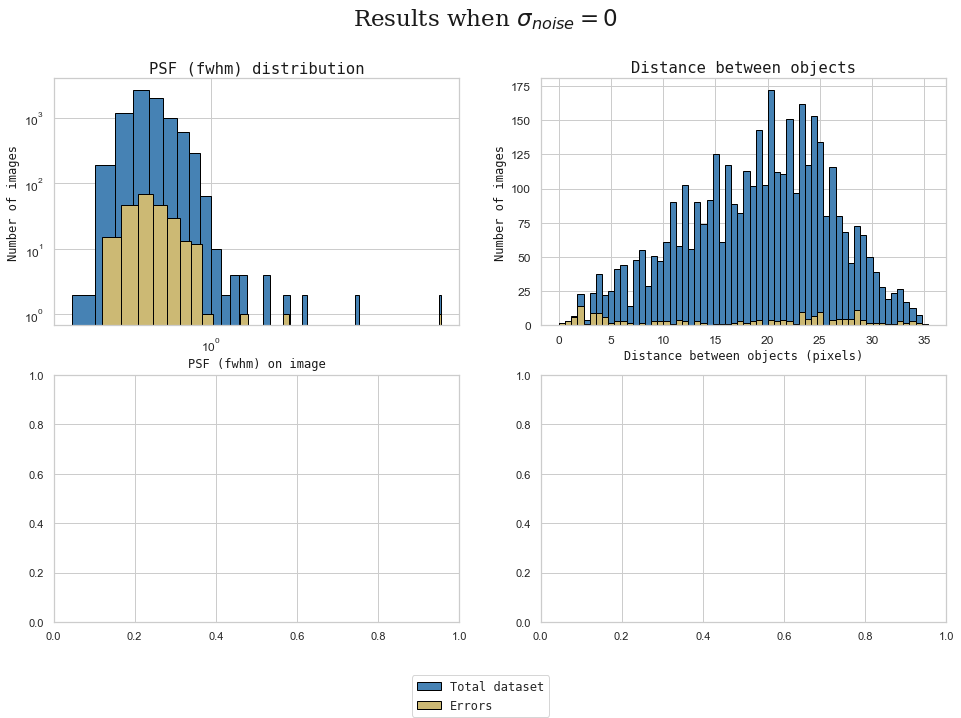

In [77]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#Start plot
#Start plot
fig, ax = plt.subplots(2,2,figsize=(16,10))
#Title
fig.suptitle('Results when $\sigma_{noise} = 0$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('PSF (fwhm) distribution', fontdict=font, fontsize=15.5)
ax[0,0].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(errors0['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second plot
ax[0,1].set_title('Distance between objects', fontdict=font, fontsize=15.5)
ax[0,1].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(errors_na0['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)

#Add legend
labels_legend=["Total dataset", "Errors"]
fig.legend([x, y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'normal','size': 12})
plt.show()

## ERRORS AND DISTANCE BETWEEN OBJECTS
---

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


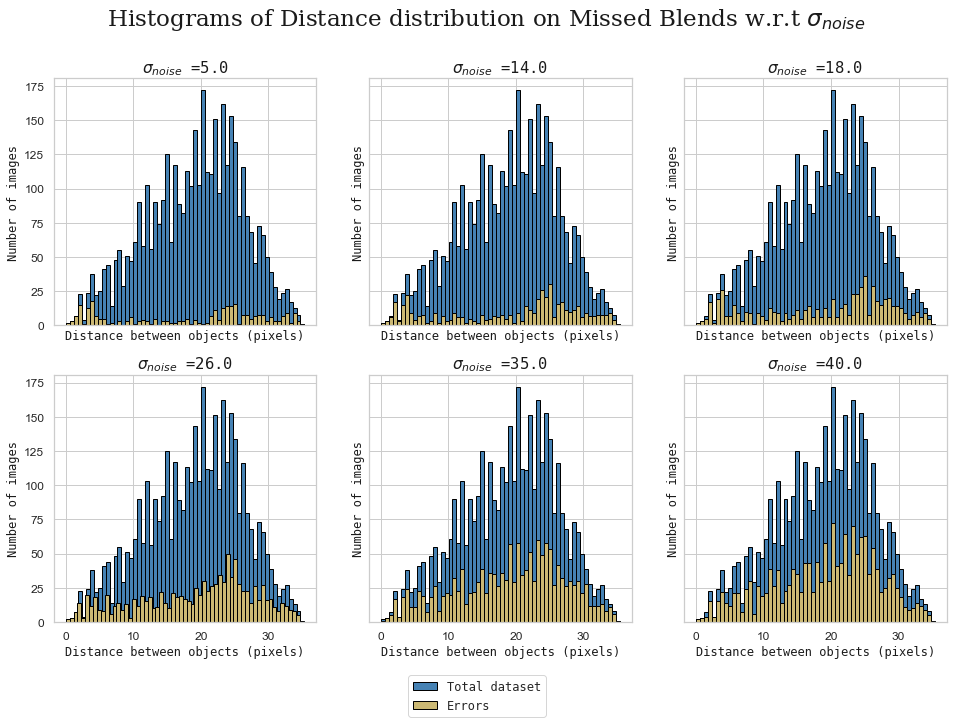

In [229]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#Start plot
fig, ax = plt.subplots(2,3,figsize=(16,10), sharey='row', sharex=True)
#Title
fig.suptitle('Histograms of Distance distribution on Missed Blends w.r.t $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,0].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(errors_na5['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[0,1].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(errors_na14['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
#3rd subplot 
ax[0,2].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[0,2].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,2].hist(errors_na18['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,2].set_ylabel('Number of images', fontdict = font)
ax[0,2].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
#4th subplot 
ax[1,0].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[1,0].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,0].hist(errors_na26['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,0].set_ylabel('Number of images', fontdict = font)
ax[1,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[1,1].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,1].hist(errors_na35['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,1].set_ylabel('Number of images', fontdict = font)
ax[1,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[1,2].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
x=ax[1,2].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
y=ax[1,2].hist(errors_na40['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,2].set_ylabel('Number of images', fontdict = font)
ax[1,2].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)

#Add legend
labels_legend=["Total dataset", "Errors"]
fig.legend([x, y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'normal','size': 12})
plt.show()

## ERRORS AND PSF (fwhm)
---

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


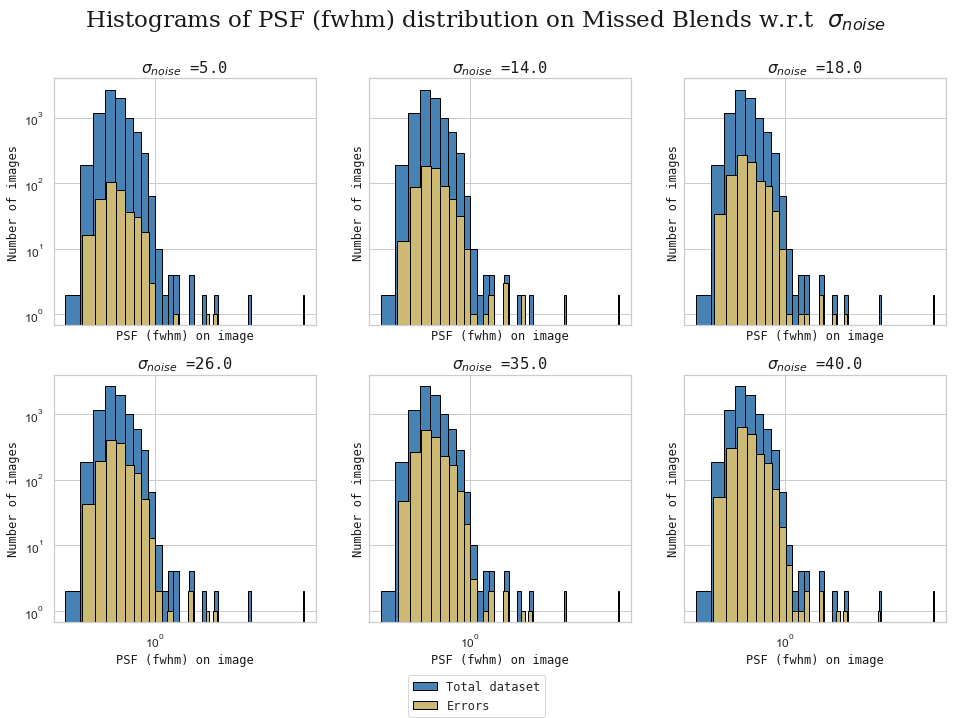

In [36]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#Start plot
fig, ax = plt.subplots(2,3,figsize=(16,10), sharey='row', sharex=True)
#Title
fig.suptitle('Histograms of PSF (fwhm) distribution on Missed Blends w.r.t  $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,0].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(errors5['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[0,1].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(errors14['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
#3rd subplot 
ax[0,2].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[0,2].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,2].hist(errors18['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,2].set_ylabel('Number of images', fontdict = font)
ax[0,2].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
#4th subplot 
ax[1,0].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[1,0].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,0].hist(errors26['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,0].set_ylabel('Number of images', fontdict = font)
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[1,1].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,1].hist(errors35['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,1].set_ylabel('Number of images', fontdict = font)
ax[1,1].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[1,2].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
x=ax[1,2].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
y=ax[1,2].hist(errors40['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,2].set_ylabel('Number of images', fontdict = font)
ax[1,2].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)

#Add legend
labels_legend=["Total dataset", "Errors"]
fig.legend([x, y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'normal','size': 12})

plt.show()

## ERRORS AND SNR OF THE CENTRAL OBJECT ( $\alpha$ )
---

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


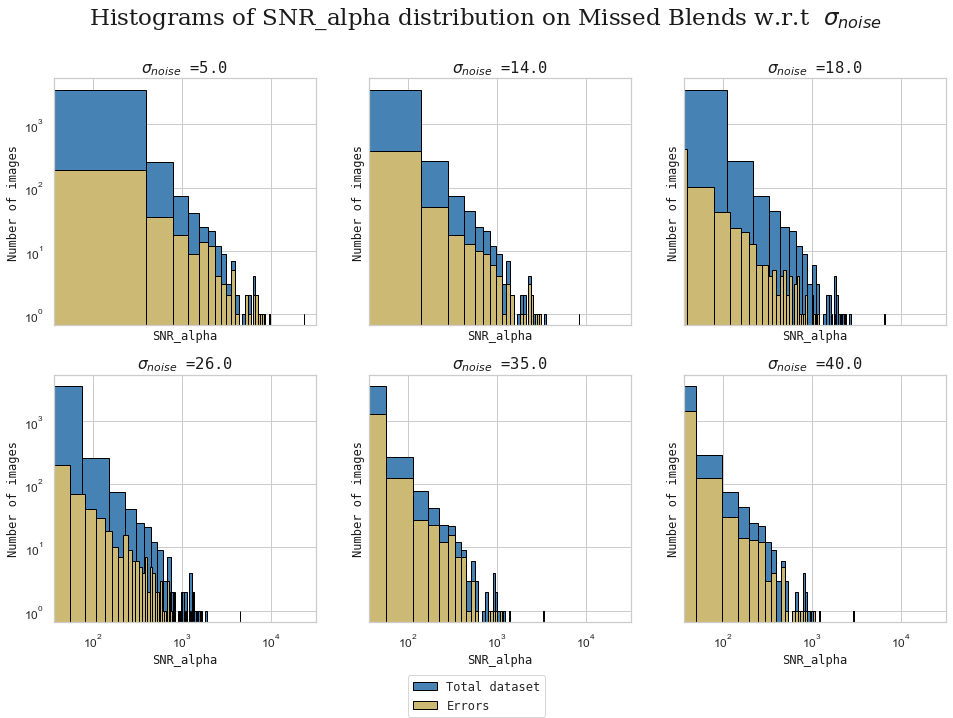

In [269]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#STart plot
fig, ax = plt.subplots(2,3,figsize=(16,10), sharey='row', sharex=True)
#Title
fig.suptitle('Histograms of SNR_alpha distribution on Missed Blends w.r.t  $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,0].hist(Results_na['snr_a5'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(errors_na5['snr_a5'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('SNR_alpha', fontdict = font)
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[0,1].hist(Results_na['snr_a14'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(errors_na14['snr_a14'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('SNR_alpha', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
#3rd subplot 
ax[0,2].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[0,2].hist(Results_na['snr_a18'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,2].hist(errors_na18['snr_a18'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,2].set_ylabel('Number of images', fontdict = font)
ax[0,2].set_xlabel('SNR_alpha', fontdict = font)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
#4th subplot 
ax[1,0].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[1,0].hist(Results_na['snr_a26'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,0].hist(errors_na26['snr_a26'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,0].set_ylabel('Number of images', fontdict = font)
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('SNR_alpha', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[1,1].hist(Results_na['snr_a35'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,1].hist(errors_na35['snr_a35'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,1].set_ylabel('Number of images', fontdict = font)
ax[1,1].set_xlabel('SNR_alpha', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[1,2].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
x=ax[1,2].hist(Results_na['snr_a40'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
y=ax[1,2].hist(errors_na40['snr_a40'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,2].set_ylabel('Number of images', fontdict = font)
ax[1,2].set_xlabel('SNR_alpha', fontdict = font)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)

#Add legend
labels_legend=["Total dataset", "Errors"]
fig.legend([x, y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'normal','size': 12})

plt.show()

## ERRORS AND SNR OF SECOND OBJECT ( $\beta$ )
---

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


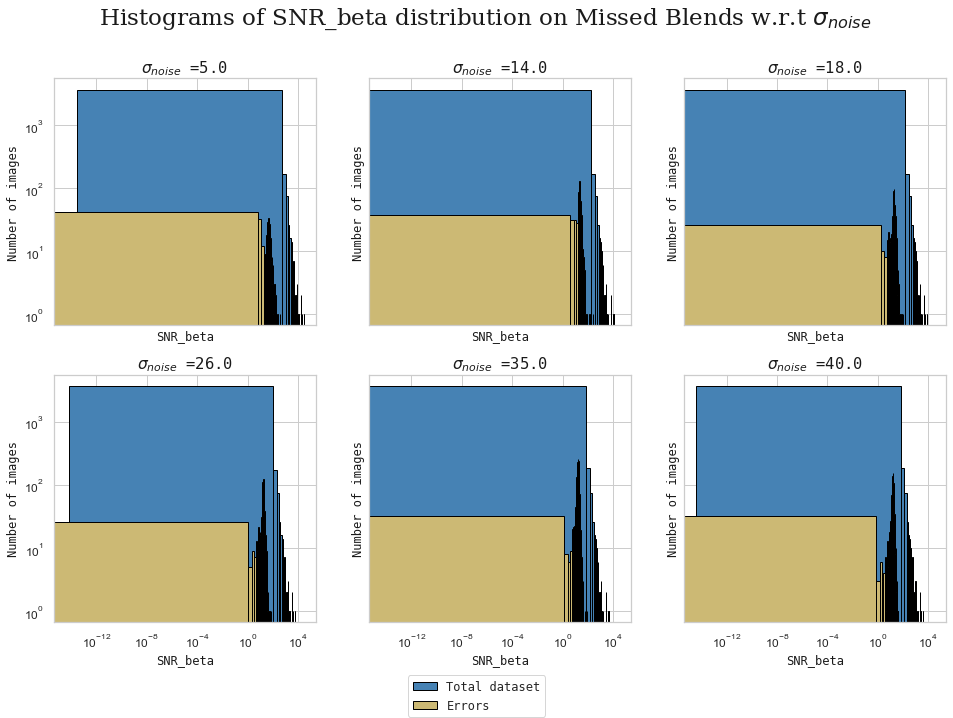

In [66]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#Start plot
fig, ax = plt.subplots(2,3,figsize=(16,10), sharey='row', sharex=True)
#Title
fig.suptitle('Histograms of SNR_beta distribution on Missed Blends w.r.t $\sigma_{noise}$', fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)

#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,0].hist(Results_na['snr_b5'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(errors_na5['snr_b5'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('SNR_beta', fontdict = font)
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[0,1].hist(Results_na['snr_b14'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(errors_na14['snr_b14'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('SNR_beta', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
#3rd subplot 
ax[0,2].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[0,2].hist(Results_na['snr_b18'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,2].hist(errors_na18['snr_b18'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,2].set_ylabel('Number of images', fontdict = font)
ax[0,2].set_xlabel('SNR_beta', fontdict = font)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
#4th subplot 
ax[1,0].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[1,0].hist(Results_na['snr_b26'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,0].hist(errors_na26['snr_b26'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,0].set_ylabel('Number of images', fontdict = font)
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('SNR_beta', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[1,1].hist(Results_na['snr_b35'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,1].hist(errors_na35['snr_b35'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,1].set_ylabel('Number of images', fontdict = font)
ax[1,1].set_xlabel('SNR_beta', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[1,2].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
x=ax[1,2].hist(Results_na['snr_b40'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
y=ax[1,2].hist(errors_na40['snr_b40'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,2].set_ylabel('Number of images', fontdict = font)
ax[1,2].set_xlabel('SNR_beta', fontdict = font)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)

#Add legend
labels_legend=["Total dataset", "Errors"]
fig.legend([x, y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'normal','size': 12})

plt.show()

## ERRORS AND PSI RATIO (SNR_$\alpha$/SNR_$\beta$)

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


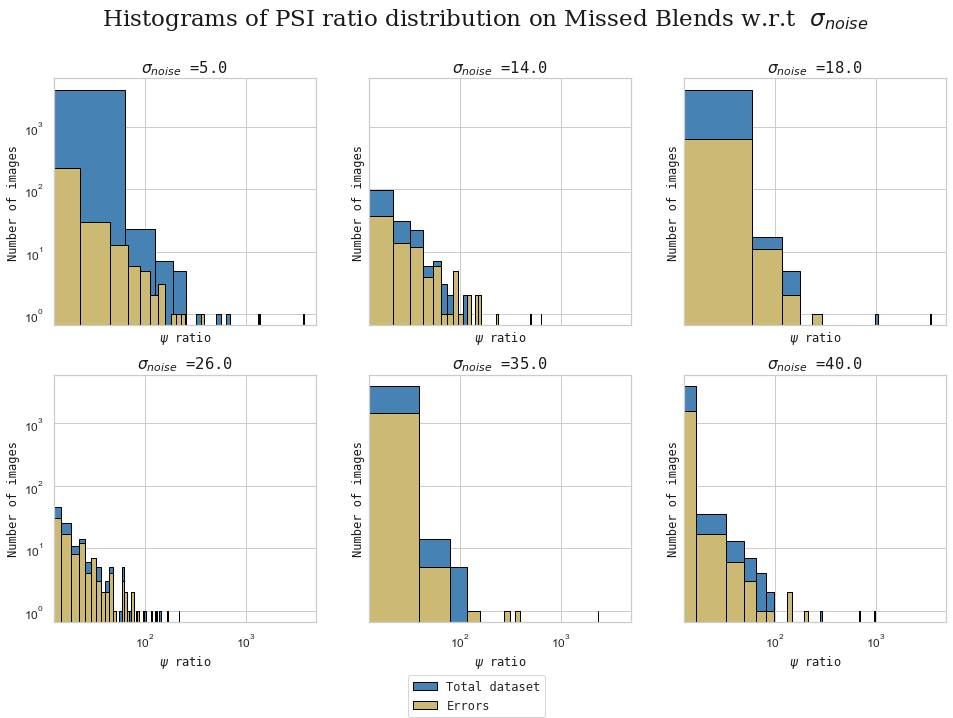

In [37]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dict
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#Start plot
fig, ax = plt.subplots(2,3,figsize=(16,10), sharey='row', sharex=True)
#Title
fig.suptitle('Histograms of PSI ratio distribution on Missed Blends w.r.t  $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,0].hist(Results_na_finite['psi5'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(errors_na_finite5['psi5'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('$\psi$ ratio', fontdict = font)
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[0,1].hist(Results_na_finite['psi14'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(errors_na_finite14['psi14'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('$\psi$ ratio', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
#3rd subplot 
ax[0,2].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[0,2].hist(Results_na_finite['psi18'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,2].hist(errors_na_finite18['psi18'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,2].set_ylabel('Number of images', fontdict = font)
ax[0,2].set_xlabel('$\psi$ ratio', fontdict = font)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
#4th subplot 
ax[1,0].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[1,0].hist(Results_na_finite['psi26'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,0].hist(errors_na_finite26['psi26'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,0].set_ylabel('Number of images', fontdict = font)
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('$\psi$ ratio', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[1,1].hist(Results_na_finite['psi35'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,1].hist(errors_na_finite35['psi35'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,1].set_ylabel('Number of images', fontdict = font)
ax[1,1].set_xlabel('$\psi$ ratio', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[1,2].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
x=ax[1,2].hist(Results_na_finite['psi40'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
y=ax[1,2].hist(errors_na_finite40['psi40'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,2].set_ylabel('Number of images', fontdict = font)
ax[1,2].set_xlabel('$\psi$ ratio', fontdict = font)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)

#Add legend
labels_legend=["Total dataset", "Errors"]
fig.legend([x, y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'normal','size': 12})

plt.show()